In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [51]:
df = pd.read_csv("data.csv")
df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [62]:
df_art = pd.read_csv("SpotifyFeatures.csv")
df_art = df_art[["artist_name", "track_id"]]
df_art.shape

(232725, 2)

In [63]:
df_joint = df.merge(df_art, how = "left", left_on = "id", right_on = "track_id")
df_joint = df_joint.dropna()
print(df_joint.shape)
df_joint.head(5)

(66031, 21)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist_name,track_id
484,0.993,"['Wolfgang Amadeus Mozart', 'Elisabeth Schuman...",0.293,228640,0.0297,0,4wIT9YfnzNNGwSrgWWc01c,0.000254,5,0.0919,...,1,"Le nozze di Figaro, K. 492 (Excerpts Sung in G...",0,1942-01-01,0.0470,102.613,0.1940,1942,Wolfgang Amadeus Mozart,4wIT9YfnzNNGwSrgWWc01c
1455,0.980,"['Giuseppe Verdi', 'Gabriele Santini', 'Maria ...",0.342,299973,0.1310,0,4rd0sL3cqM0w61MOyOhbQI,0.000010,5,0.1540,...,1,"Verdi : La Traviata : Act 1 ""Un dì, felice, et...",13,1954,0.0476,76.741,0.1600,1954,Giuseppe Verdi,4rd0sL3cqM0w61MOyOhbQI
1487,0.977,"['Giacomo Puccini', 'Maria Callas', 'Tullio Se...",0.220,384173,0.1830,0,5bLgm6Z1vD21rKHj7sxUOy,0.000255,2,0.1980,...,1,"Puccini: Turandot, Act 2: ""In questa Reggia"" (...",11,1954,0.0385,81.399,0.0639,1954,Giacomo Puccini,5bLgm6Z1vD21rKHj7sxUOy
1491,0.948,"['Giuseppe Verdi', 'Gabriele Santini', 'Maria ...",0.403,310733,0.2620,0,5hHyTASWovr1D6XrzUUsGO,0.000081,9,0.4290,...,1,"Verdi : La Traviata : Act 1 ""Dell' invito tras...",13,1954,0.0612,144.726,0.2890,1954,Giuseppe Verdi,5hHyTASWovr1D6XrzUUsGO
1504,0.976,"['Giuseppe Verdi', 'Gabriele Santini', 'Maria ...",0.272,259533,0.0730,0,64TLtwmhZvePLdJcb1oPOF,0.000071,2,0.0778,...,0,"Verdi : La Traviata : Act 2 ""Dammi tu forza, o...",10,1954,0.0533,78.717,0.0365,1954,Giuseppe Verdi,64TLtwmhZvePLdJcb1oPOF


In [70]:
df_artY_2018 = df_joint[df_joint["year"] == 2018]
df_artY_2018 = df_artY_2018[["artist_name", "popularity"]]
df_artY_2018.head(5)

,artist_name,popularity
8594,David Guetta,66
8595,David Guetta,66
8597,Morgan Wallen,61
8598,Ariana Grande,67
8599,Ariana Grande,67


In [72]:
artist_by_pop = df_artY_2018.groupby("artist_name").sum()
artist_by_pop = artist_by_pop.sort_values(by = "popularity", ascending = False)

In [98]:
artist_by_songs = df_artY_2018.groupby("artist_name").count()
artist_by_songs = artist_by_songs.sort_values(by = "popularity", ascending = False)

In [76]:
artist_by_pop.iloc[:10]

,popularity
artist_name,
Drake,4019
Joji,3946
Playboi Carti,3087
Travis Scott,2874
Future,2862
Lil Baby,2832
Post Malone,2714
XXXTENTACION,2663
Mac Miller,2547


Text(0.5, 0, 'Popularity')

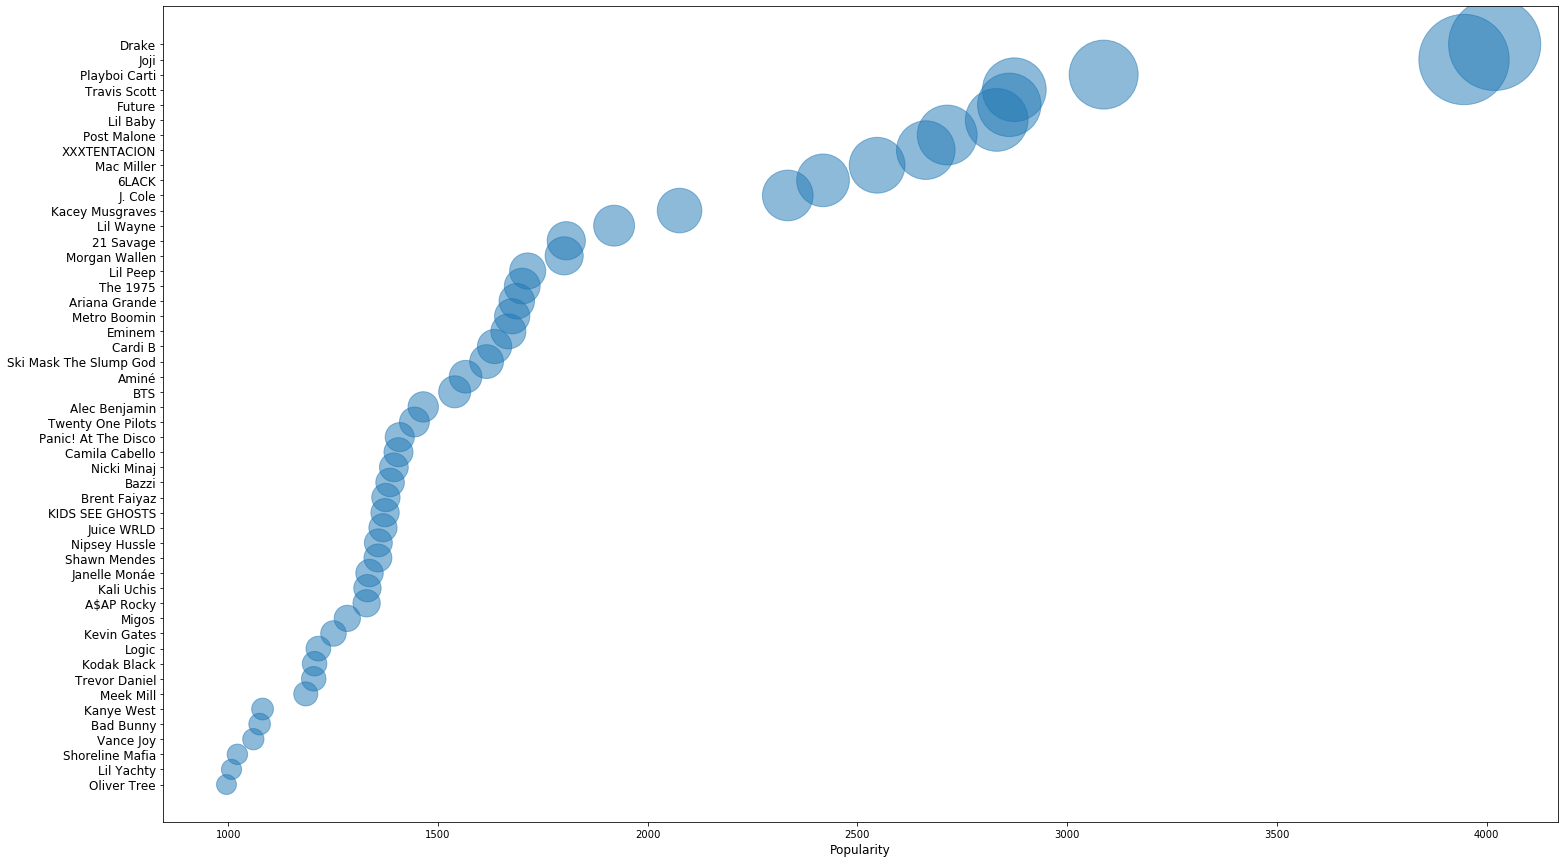

In [115]:
top_50 = artist_by_pop.iloc[:50]
plt.figure(figsize = (25, 15))
plt.scatter(x = top_50[::-1], y = top_50.index[::-1], s = top_50[::-1]**2.2 / 10000, alpha = 0.5)
plt.yticks(fontsize = 12)
plt.xlabel("Popularity", fontsize = 12)